# TITANIC SURVIVAL
1. PassengerID - Unique number assignned to each passenger
2. Survived - Whether the passenger survived(1) or not(0) - Categorical
3. PClass - Class in which the passenger travelled(1,2,3) - Categorical
4. Name - Name of the passenger
5. Sex - Gender of the passenger - Categorical(Male/Female)
6. Age - Age in years
7. SibSp - Number of siblings/spouse aboard the Titanic
8. Parch - Number of parents/children aboard the Titanic
9. Ticket - Ticket Number
10. Fare - Price of the ticket
11. Cabin - Cabin number of the passenger
11. Embarked - Port of Embarkation - Categorical(C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
df = pd.read_csv("D:/STUDIES/DATA TRAINED/DATASETS/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

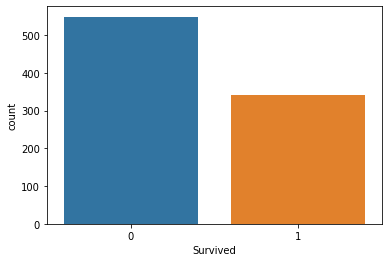

In [8]:
sns.countplot(x='Survived',data = df)

In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df_sursex = df[['Survived','Sex']]
df_sursex
df_sur = df_sursex[df_sursex['Survived']==1]
df_nsur = df_sursex[df_sursex['Survived']==0]
print("Number of men and women who survived :\n",df_sur["Sex"].value_counts())
print("Number of men and women who died :\n",df_nsur["Sex"].value_counts())

Number of men and women who survived :
 female    233
male      109
Name: Sex, dtype: int64
Number of men and women who died :
 male      468
female     81
Name: Sex, dtype: int64


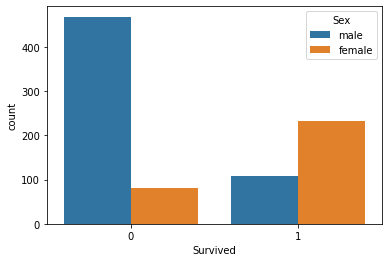

In [11]:
sns.countplot(x='Survived',hue = 'Sex', data = df)

##### Women had higher chances of survival than men

In [12]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
def extract(a):
    return (len(df[df["Pclass"]==a]))

df_surclass = df[['Survived','Pclass']]
# df_surclass
df_sur = df_surclass[df_surclass['Survived']==1]
# df_nsur = df_surclass[df_surclass['Survived']==0]

df_surclass_count = pd.DataFrame(data=df_sur["Pclass"].value_counts())
df_surclass_count.reset_index(level=0, inplace=True) #To ensure that the Pclass(1,3,2) is not used as index
df_surclass_count.rename(columns={'index':'Pclass','Pclass':'Survivors'},inplace=True)


df_surclass_count["Total number of people"] = df_surclass_count.apply(lambda row : extract(row['Pclass']), axis = 1) 
df_surclass_count["Percentage survived"] = df_surclass_count["Survivors"]*100/df_surclass_count["Total number of people"]

df_surclass_count



# print("Number of people of who died from each class :\n",df_nsur["Pclass"].value_counts())

,Pclass,Survivors,Total number of people,Percentage survived
0,1,136,216,62.962963
1,3,119,491,24.236253
2,2,87,184,47.282609


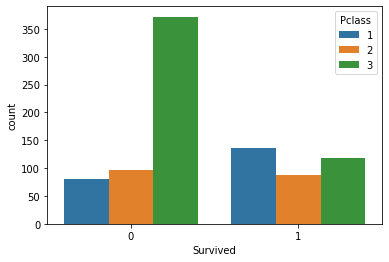

In [14]:
sns.countplot(x='Survived',hue = 'Pclass', data = df)

##### Passengrers in 1st class had higher chances of survival

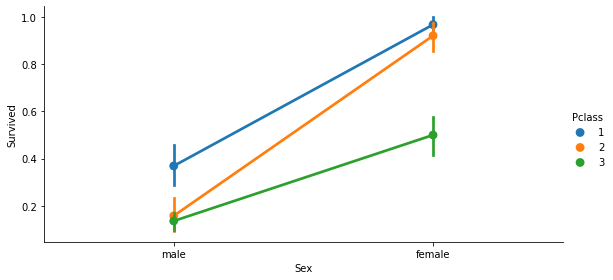

In [15]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=df)

##### Men in 1st class had higher chances of survival than men in other classes, same applies for women, nut
##### Difference in survival rates between women in 2nd and 3rd class is small
##### Difference in survival rates between men in 1st and 2nd class is small

In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
def extract(a):
    return (len(df[df["Embarked"]==a]))

df_sur_emb = df[['Survived','Embarked']]
df_sur = df_sur_emb[df_sur_emb['Survived']==1]
# df_nsur = df_surclass[df_sur_emb['Survived']==0]

df_sur_emb_count = pd.DataFrame(data=df_sur["Embarked"].value_counts())
df_sur_emb_count.reset_index(level=0, inplace=True) #To ensure that the Pclass(1,3,2) is not used as index
df_sur_emb_count.rename(columns={'index':'Embarked','Embarked':'Survivors'},inplace=True)


df_sur_emb_count["Total number of people"] = df_sur_emb_count.apply(lambda row : extract(row['Embarked']), axis = 1) 
df_sur_emb_count["Percentage survived"] = df_sur_emb_count["Survivors"]*100/df_sur_emb_count["Total number of people"]

df_sur_emb_count


,Embarked,Survivors,Total number of people,Percentage survived
0,S,217,644,33.695652
1,C,93,168,55.357143
2,Q,30,77,38.961039


##### Passengrers who boarded from Cherbourg had higher survival rate

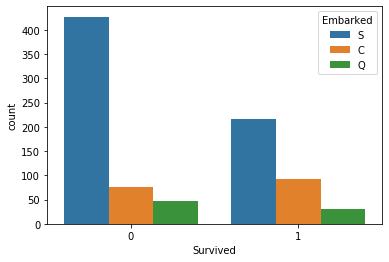

In [18]:
sns.countplot(x='Survived',hue = 'Embarked', data = df)

In [19]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
df_parch_sur = pd.DataFrame(df.groupby('Parch')["Survived"].value_counts())
df_parch_sur

Survived
Parch Survived          
0     0              445
      1              233
1     1               65
      0               53
2     0               40
      1               40
3     1                3
      0                2
4     0                4
5     0                4
      1                1
6     0                1

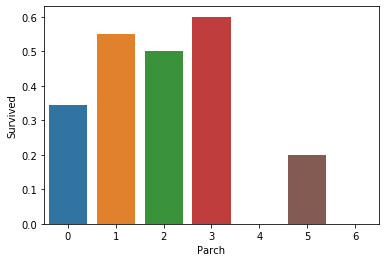

In [21]:
sns.barplot(x='Parch', y='Survived', ci=None, data=df)

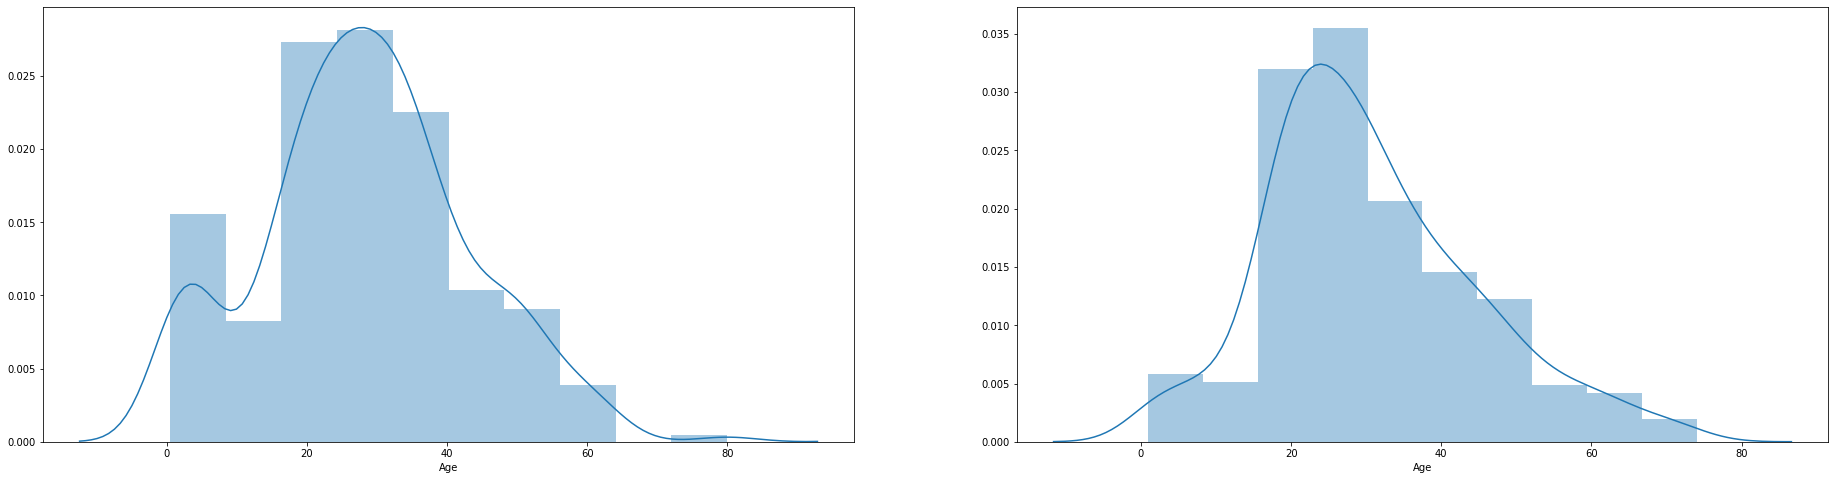

In [22]:
plt.figure(figsize=(32,8))
plt.subplot(1,2,1)
sns.distplot(df[df["Survived"]==1]["Age"],bins=10)
plt.subplot(1,2,2)
sns.distplot(df[df["Survived"]==0]["Age"],bins=10)

##### Rate of survival is highest in the age range of 20-40 years

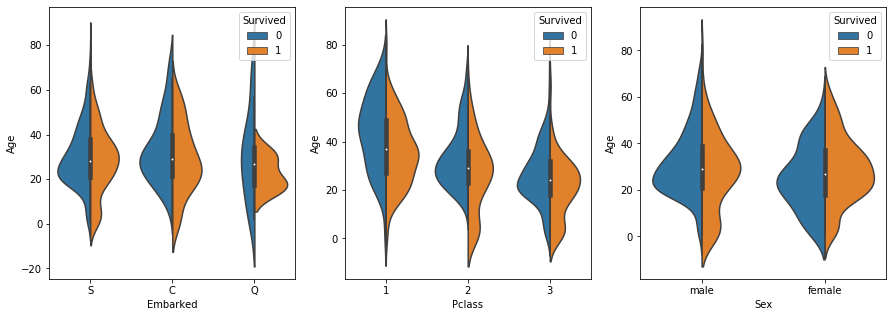

In [23]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, split=True)
plt.subplot(1,3,2)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)
plt.subplot(1,3,3)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

##### Men & Women in age range of 20-40 had higher rate of survival
##### People who boarded in Cherbourg and Queenstown in the age range of 15-30 had higher rate of survival

### DATA PREPROCESSING

In [24]:
df_null_count = pd.DataFrame(data = df.isnull().sum(),columns=["Count"])
df_null_count["Percentage"] = df_null_count["Count"]*100/len(df)
df_null_count

,Count,Percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


##### 1."Cabin" column has 78% null values so it can be dropped
##### 2. "Name", "Ticket" and "PassengerId" colmns can also be dropped

In [25]:
df.drop("Cabin",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##### 1. Null values(only 2) in "Embarked" can be filled with the frequently occuring variable
##### 2. Filling "Age" after computing random values in the range (mean-std, mean+std)

In [26]:
df['Embarked'] = df['Embarked'].fillna('S')

### AGE ###

mean_age = df["Age"].mean()
std_age = df["Age"].std()
null_values = df["Age"].isnull().sum()
# print(mean_age,std_age,null_values)

rand_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = null_values)
df.loc[np.isnan(df["Age"]),"Age"] = rand_age

df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### Converting categorical variables - "Sex", "Embarked" - into numeric values

In [27]:
df['Sex'] = df['Sex'].map({"male": 0, "female": 1})
df['Embarked'] = df['Embarked'].map({"S": 0, "C": 1, "Q": 2})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [28]:
df['Age'] = df['Age'].astype("int")
df['Fare'] = df['Fare'].astype("int")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


##### Converting "Age" and "Fare" into categorical variables

In [34]:
pd.qcut(df['Age'], q=6).value_counts()

(-0.001, 18.0]    170
(34.0, 42.0]      155
(28.0, 34.0]      147
(23.0, 28.0]      147
(18.0, 23.0]      139
(42.0, 80.0]      133
Name: Age, dtype: int64

In [37]:
df.loc[ df['Age'] <= 18, 'Age'] = 0
df.loc[(df['Age'] > 18) & (df['Age'] <= 23), 'Age'] = 1
df.loc[(df['Age'] > 23) & (df['Age'] <= 28), 'Age'] = 2
df.loc[(df['Age'] > 28) & (df['Age'] <= 34), 'Age'] = 3
df.loc[(df['Age'] > 34) & (df['Age'] <= 42), 'Age'] = 4
df.loc[(df['Age'] > 42) & (df['Age'] <= 80), 'Age'] = 5

df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7,0
1,1,1,1,4,1,0,71,1
2,1,3,1,2,0,0,7,0
3,1,1,1,4,1,0,53,0
4,0,3,0,4,0,0,8,0
5,0,3,0,4,0,0,8,2
6,0,1,0,5,0,0,51,0
7,0,3,0,0,3,1,21,0
8,1,3,1,2,0,2,11,0
9,1,2,1,0,1,0,30,1


In [40]:
pd.qcut(df['Fare'], q=4).value_counts()

(-0.001, 7.0]    241
(14.0, 31.0]     223
(7.0, 14.0]      216
(31.0, 512.0]    211
Name: Fare, dtype: int64

In [41]:
df.loc[ df['Fare'] <= 7, 'Fare'] = 0
df.loc[(df['Fare'] > 7)  & (df['Fare'] <= 14), 'Fare'] = 1
df.loc[(df['Fare'] > 14) & (df['Fare'] <= 31), 'Fare'] = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 512),'Fare'] = 3

df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,4,1,0,3,1
2,1,3,1,2,0,0,0,0
3,1,1,1,4,1,0,3,0
4,0,3,0,4,0,0,1,0
5,0,3,0,4,0,0,1,2
6,0,1,0,5,0,0,3,0
7,0,3,0,0,3,1,2,0
8,1,3,1,2,0,2,1,0
9,1,2,1,0,1,0,2,1


##### Combining the "Parch" and "SibSp" columns into one single column "Single/Family"-(0/1)

In [46]:
df['Single/Family'] = 1
df.loc[(df['Parch'] == 0) & (df['SibSp']==0) , 'Single/Family'] = 0
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Single/Family
0,0,3,0,1,1,0,0,0,1
1,1,1,1,4,1,0,3,1,1
2,1,3,1,2,0,0,0,0,0
3,1,1,1,4,1,0,3,0,1
4,0,3,0,4,0,0,1,0,0
5,0,3,0,4,0,0,1,2,0
6,0,1,0,5,0,0,3,0,0
7,0,3,0,0,3,1,2,0,1
8,1,3,1,2,0,2,1,0,1
9,1,2,1,0,1,0,2,1,1


##### Now, we can drop "Parch" and  "SibSp" columns

In [47]:
df.drop("Parch",axis=1,inplace=True)
df.drop("SibSp",axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Single/Family
0,0,3,0,1,0,0,1
1,1,1,1,4,3,1,1
2,1,3,1,2,0,0,0
3,1,1,1,4,3,0,1
4,0,3,0,4,1,0,0


### MODEL DEVELOPMENT

#### PREPARING DATASET FOR TRAINING

In [48]:
x = df.drop("Survived",axis=1)
y = df['Survived']

In [51]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [63]:
accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    log.fit(x_train,y_train)
    pred = log.predict(x_test)
    temp_accu = log.score(x_train,y_train)
    if(temp_accu > accu):
        accu = temp_accu
        rand_state = i
print("Best Random State : ",rand_state)
print("Accuracy : ",accu*100)

Best Random State :  334
Accuracy :  81.74157303370787


In [64]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

In [81]:
accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    dec.fit(x_train,y_train)
    pred = dec.predict(x_test)
    temp_accu = dec.score(x_train,y_train)
    if(temp_accu > accu):
        accu = temp_accu
        rand_state = i
print("Best Random State : ",rand_state)
print("Accuracy : ",accu*100)

Best Random State :  460
Accuracy :  90.1685393258427


In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [83]:
accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_test)
    temp_accu = rfc.score(x_train,y_train)
    if(temp_accu > accu):
        accu = temp_accu
        rand_state = i
print("Best Random State : ",rand_state)
print("Accuracy : ",accu*100)

Best Random State :  460
Accuracy :  90.1685393258427


In [68]:
from sklearn.svm import SVC
svc = SVC()

In [69]:
accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    svc.fit(x_train,y_train)
    pred = svc.predict(x_test)
    temp_accu = svc.score(x_train,y_train)
    if(temp_accu > accu):
        accu = temp_accu
        rand_state = i
print("Best Random State : ",rand_state)
print("Accuracy : ",accu*100)

Best Random State :  256
Accuracy :  85.39325842696628


## RANDOM FOREST IS THE MODEL WITH BEST ACCURACY

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=460,test_size=0.20)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accu = round(rfc.score(x_train, y_train) * 100, 2)
print ("Accuracy: ", accu)
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy:  90.17


array([[91, 23],
       [24, 41]], dtype=int64)

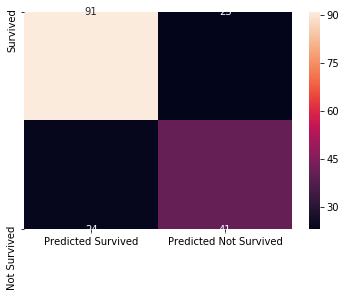

In [88]:
df_cnf_matrix = pd.DataFrame(cnf_matrix, index = ['Survived', 'Not Survived'], columns = ['Predicted Survived', 'Predicted Not Survived'])
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

In [90]:
y_pred = rfc.predict(x_test)
rfc.score(x_train, y_train)

0.901685393258427

### SERIALIZATION

In [94]:
import joblib
joblib.dump(rfc,"Titanic.pkl")

['Titanic.pkl']